# Logistic Regression for Bank Loan Modelling

## Assignment to find which independent variable is most significant for getting personal loan

In [70]:
import pandas as pd
import statsmodels.api as sm

In [71]:
dataset = pd.read_excel("dataset/Bank_Personal_Loan_Modelling.xlsx", sheet_name=1)

In [72]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [73]:
# dropping ID and ZIP Code columns from dataset as discussed in class
df = dataset.drop(["ID", "ZIP Code"], axis = 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [74]:
# Dependent variable
Y = df['Personal Loan']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [75]:
X = df.loc[:, df.columns != 'Personal Loan']
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [76]:
X1 = sm.add_constant(X)

In [77]:
Logistic = sm.Logit(Y,X1)

In [78]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [79]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        00:36:50   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

### Inferences based on above model
#### Income, Family, Education, CD Account, Online, CreditCard are most significant for getting personal loan as P = 0.00  
#### CC Avg, Securities Account are significant for getting personal loan as P<0.05  
#### Age, Education and Mortgage are least significant for getting personal loan as P>0.05

# Logistic Regression for Attrition Analysis

In [109]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [110]:
dataset1 = pd.read_csv("dataset/general_data.csv")

In [111]:
dataset1.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


In [112]:
dataset1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [114]:
dataset1["NumCompaniesWorked"].fillna(value=0, inplace=True)
dataset1["TotalWorkingYears"].fillna(value=0, inplace=True)
dataset1.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [115]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [116]:
dataset1['BusinessTravel'] = labelencoder.fit_transform(dataset1['BusinessTravel'])

In [117]:
dataset1['Department'] = labelencoder.fit_transform(dataset1['Department'])

In [118]:
dataset1['EducationField'] = labelencoder.fit_transform(dataset1['EducationField'])

In [119]:
dataset1['Gender'] = labelencoder.fit_transform(dataset1['Gender'])

In [120]:
dataset1['JobRole'] = labelencoder.fit_transform(dataset1['JobRole'])

In [121]:
dataset1['MaritalStatus'] = labelencoder.fit_transform(dataset1['MaritalStatus'])

In [122]:
dataset1['Attrition'] = labelencoder.fit_transform(dataset1['Attrition'])
dataset.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


In [123]:
# dropping redundant variables
df = dataset1.drop(["EmployeeCount", "EmployeeID", "Over18"], axis = 1)
df.head().T

,0,1,2,3,4
Age,51.0,31.0,32.0,38.0,32.0
Attrition,0.0,1.0,0.0,0.0,0.0
BusinessTravel,2.0,1.0,1.0,0.0,2.0
Department,2.0,1.0,1.0,1.0,1.0
DistanceFromHome,6.0,10.0,17.0,2.0,10.0
Education,2.0,1.0,4.0,5.0,1.0
EducationField,1.0,1.0,4.0,1.0,3.0
Gender,0.0,0.0,1.0,1.0,1.0
JobLevel,1.0,1.0,4.0,3.0,1.0
JobRole,0.0,6.0,7.0,1.0,7.0


In [124]:
# Dependent variable
Y = df['Attrition']
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int32

In [125]:
X = df.loc[:, df.columns != 'Attrition']
X.head().T

,0,1,2,3,4
Age,51.0,31.0,32.0,38.0,32.0
BusinessTravel,2.0,1.0,1.0,0.0,2.0
Department,2.0,1.0,1.0,1.0,1.0
DistanceFromHome,6.0,10.0,17.0,2.0,10.0
Education,2.0,1.0,4.0,5.0,1.0
EducationField,1.0,1.0,4.0,1.0,3.0
Gender,0.0,0.0,1.0,1.0,1.0
JobLevel,1.0,1.0,4.0,3.0,1.0
JobRole,0.0,6.0,7.0,1.0,7.0
MaritalStatus,1.0,2.0,1.0,1.0,2.0


In [126]:
X1 = sm.add_constant(X)

In [127]:
Logistic = sm.Logit(Y,X1)

In [128]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393042
         Iterations 7


In [129]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        00:45:00   Log-Likelihood:                -1733.3
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.779e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0310      0.007     -4.567      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.270      0.787      -0.146       0.111
Department                 -0.2410      0.081     -2.967      0.003      -0.400      -0.082
DistanceFromHome           -0.0013      0.005     -0.242      0.809      -0.012       0.009
Education                  -0.0629      0.043     -1.476      0.140      -0.146       0.021
EducationField             -0.0961      0.033     -2.880      0.004      -0.161      -0.031
Gender                      0.0865      0.090      0.966      0.334      -0.089       0.262
JobLevel                   -0.0230      0.040     -0.580      0.562      -0.101       0.055
JobRole                     0.0377      0.018      2.107      0.035       0.003       0.073
MaritalStatus               0.5888      0.063      9.322      0.000       0.465       0.713
MonthlyIncome           -1.881e-06   9.56e-07     -1.968      0.049   -3.75e-06   -7.59e-09
NumCompaniesWorked          0.1149      0.018      6.281      0.000       0.079       0.151
PercentSalaryHike           0.0117      0.012      0.991      0.321      -0.011       0.035
StandardHours               0.0103      0.052      0.199      0.842      -0.091       0.112
StockOptionLevel           -0.0641      0.052     -1.242      0.214      -0.165       0.037
TotalWorkingYears          -0.0569      0.012     -4.858      0.000      -0.080      -0.034
TrainingTimesLastYear      -0.1469      0.035     -4.178      0.000      -0.216      -0.078
YearsAtCompany              0.0111      0.018      0.612      0.541      -0.025       0.047
YearsSinceLastPromotion     0.1324      0.020      6.469      0.000       0.092       0.173
YearsWithCurrManager       -0.1392      0.022     -6.292      0.000      -0.183      -0.096
===========================================================================================
"""

### Inferences based on above model
#### Marital Status, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsSinceLastPromotion, YearsWithCurrManager are most significant for getting personal loan as P = 0.00  
#### Department, EducationField, JobRole, MonthlyIncome are significant for getting personal loan as P<0.05  
#### BusinessTravel, DistanceFromHome, Education, Gender, JobLevel, PercentSalaryHike, StandardHours, StockOptionLevel and YearsAtCompany are least significant for getting personal loan as P>0.05

# Linear Regression on Real Estate Analysis
## Linear regression assignment: price vs sqft_living, price vs bedrooms, price vs bathrooms, price vs floors

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [320]:
data = pd.read_excel('dataset/Linear Regression.xlsx', sheet_name=0)

In [321]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [323]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [324]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


#### 1. EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E6899E6C8>,
      dtype=object)

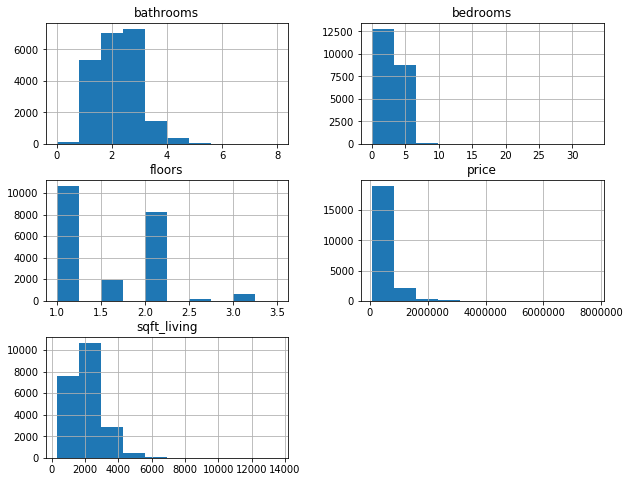

In [325]:
data.hist(figsize=(10,8))

In [326]:
# Correlation matrix
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


In [327]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

##### price vs sqft_living

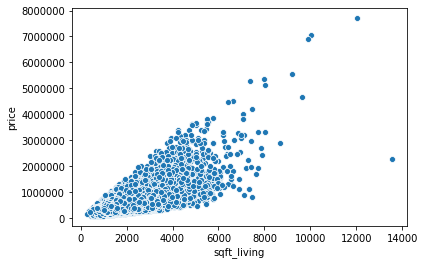

In [328]:
sns.scatterplot(data['sqft_living'],data['price'])

##### price vs bedrooms

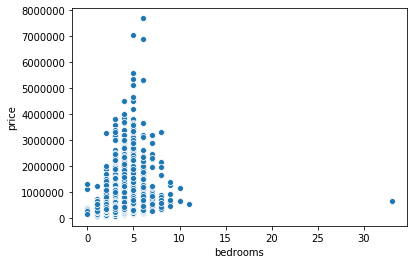

In [329]:
sns.scatterplot(data['bedrooms'],data['price'])

##### price vs bathrooms

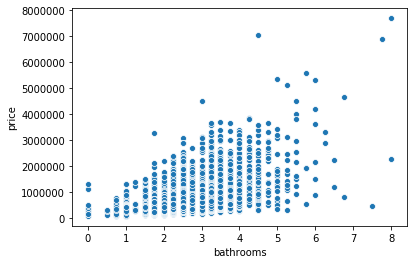

In [330]:
sns.scatterplot(data['bathrooms'],data['price'])

##### price vs floors

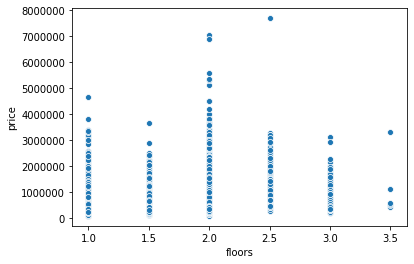

In [331]:
sns.scatterplot(data['floors'],data['price'])

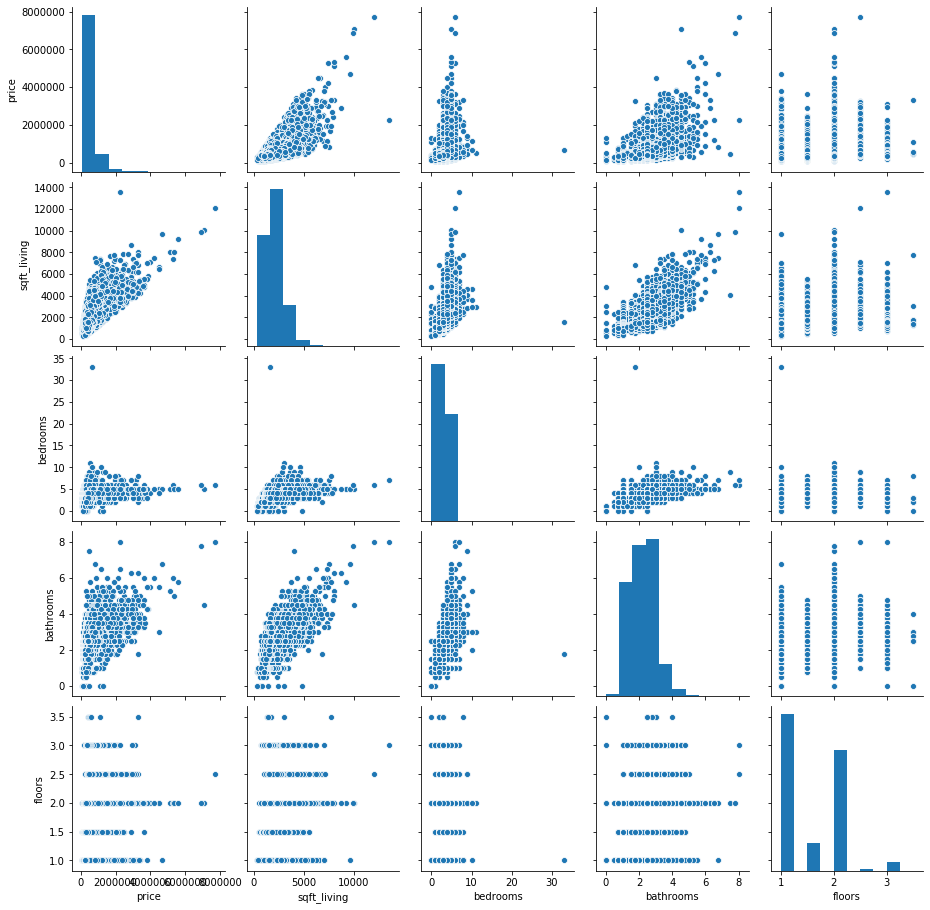

In [332]:
sns.pairplot(data)

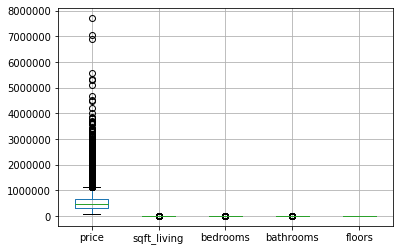

In [333]:
data.boxplot()

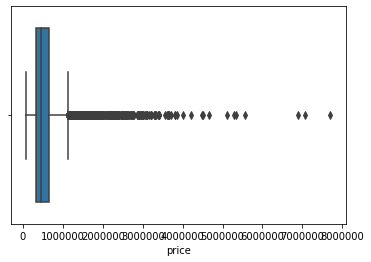

In [334]:
sns.boxplot(data['price'])

### price vs sqft_living

#### 2. Assign the features to X and Y

In [335]:
x = data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [336]:
y = data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


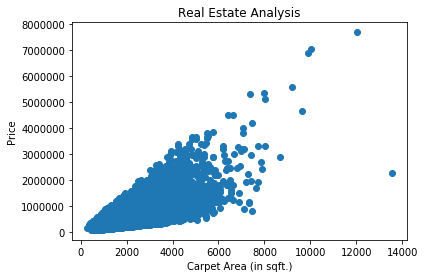

In [337]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Real Estate Analysis')
plt.xlabel('Carpet Area (in sqft.)')
plt.ylabel('Price')
plt.show()

#### 3. Split the records for training & testing

In [338]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [339]:
data.shape

(21613, 5)

In [340]:
X_train.shape

(17290, 1)

In [341]:
X_test.shape

(4323, 1)

In [342]:
y_train.shape

(17290, 1)

In [343]:
y_test.shape

(4323, 1)

#### 4. Model Building with sklearn

In [344]:
lin_reg = LinearRegression()

#### 5. Train the model

In [345]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [346]:
lin_reg.coef_

array([[280.67382569]])

In [347]:
lin_reg.intercept_

array([-42568.70358496])

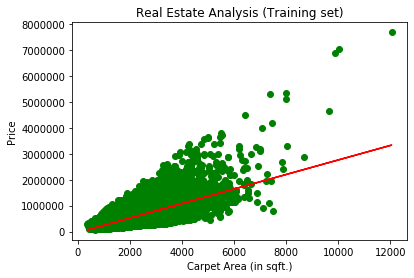

In [348]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Real Estate Analysis (Training set)')
plt.xlabel('Carpet Area (in sqft.)')
plt.ylabel('Price')
plt.show()

#### 6. Test the model

In [349]:
ypred = lin_reg.predict(X_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [350]:
X_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


In [351]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


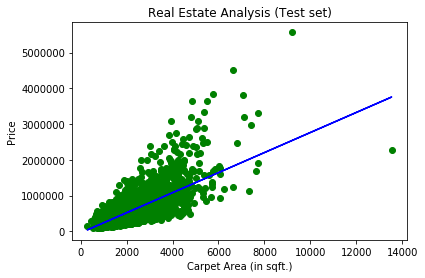

In [352]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Real Estate Analysis (Test set)')
plt.xlabel('Carpet Area (in sqft.)')
plt.ylabel('Price')
plt.show()

#### 7. Estimate the cost

In [353]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5031163723285275
The RMSE value is........ 263380.00189817196


># price vs sqft_living: Good Fit  
># Living sqft is siginificant for price.

In [354]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


#### 8. How to predict for unseen value

In [355]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[865130.44869267]]


### price vs bedrooms

#### 2. Assign the features to X and Y

In [356]:
x = data.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [357]:
y = data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


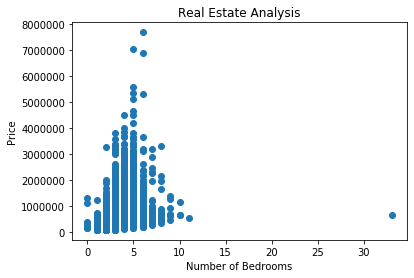

In [358]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Real Estate Analysis')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

#### 3. Split the records for training & testing

In [359]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [360]:
data.shape

(21613, 5)

In [361]:
X_train.shape

(17290, 1)

In [362]:
X_test.shape

(4323, 1)

In [363]:
y_train.shape

(17290, 1)

In [364]:
y_test.shape

(4323, 1)

#### 4. Model Building with sklearn

In [365]:
lin_reg = LinearRegression()

#### 5. Train the model

In [366]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [367]:
lin_reg.coef_

array([[118660.62797869]])

In [368]:
lin_reg.intercept_

array([139952.87593386])

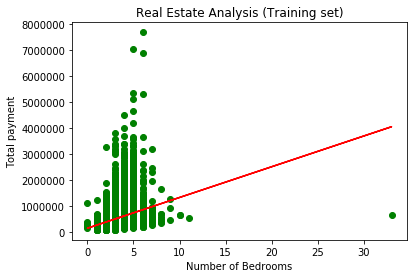

In [369]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Real Estate Analysis (Training set)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total payment')
plt.show()

#### 6. Test the model

In [370]:
ypred = lin_reg.predict(X_test)
ypred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

In [371]:
X_test.head()

,bedrooms
6638,4
7366,3
3158,2
9117,5
3392,2


In [372]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


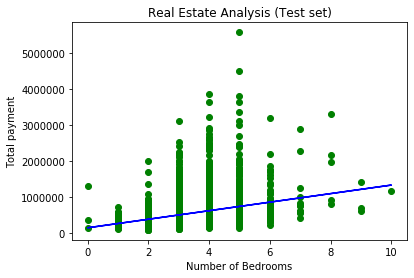

In [373]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Real Estate Analysis (Test set)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total payment')
plt.show()

#### 7. Estimate the cost

In [374]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10886345250291596
The RMSE value is........ 352717.96541876445


># price vs bedrooms: Poor Fit
># Bedrooms are not siginificant for price.

In [375]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


#### 8. How to predict for unseen value

In [376]:
unseen_pred=lin_reg.predict(np.array([[3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[495934.75986992]]


### price vs bathrooms

#### 2. Assign the features to X and Y

In [377]:
x = data.iloc[:,3:4]
x.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [378]:
y = data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


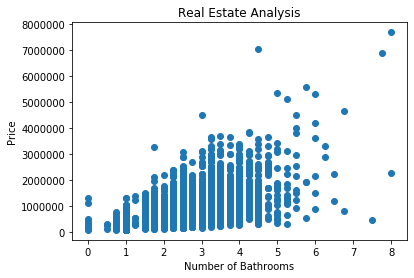

In [379]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Real Estate Analysis')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

#### 3. Split the records for training & testing

In [380]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [381]:
data.shape

(21613, 5)

In [382]:
X_train.shape

(17290, 1)

In [383]:
X_test.shape

(4323, 1)

In [384]:
y_train.shape

(17290, 1)

In [385]:
y_test.shape

(4323, 1)

#### 4. Model Building with sklearn

In [386]:
lin_reg = LinearRegression()

#### 5. Train the model

In [387]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [388]:
lin_reg.coef_

array([[249143.95803858]])

In [389]:
lin_reg.intercept_

array([13073.9957529])

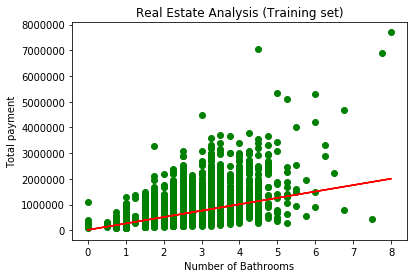

In [390]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Real Estate Analysis (Training set)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Total payment')
plt.show()

#### 6. Test the model

In [391]:
ypred = lin_reg.predict(X_test)
ypred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

In [392]:
X_test.head()

,bathrooms
6638,2.25
7366,1.50
3158,1.00
9117,3.25
3392,1.00


In [393]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


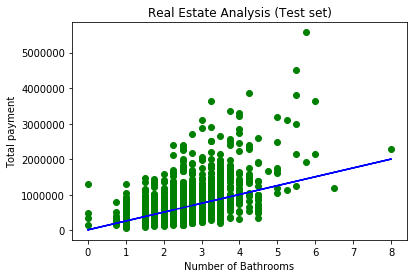

In [395]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Real Estate Analysis (Test set)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Total payment')
plt.show()

#### 7. Estimate the cost

In [396]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.28122887124177365
The RMSE value is........ 316774.90190998075


># price vs bathrooms: Poor Fit
># Bathrooms are not siginificant for price.

In [397]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


#### 8. How to predict for unseen value

In [398]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[8.05744634e+08]]


### price vs floors

#### 2. Assign the features to X and Y

In [399]:
x = data.iloc[:,4:]
x.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [400]:
y = data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


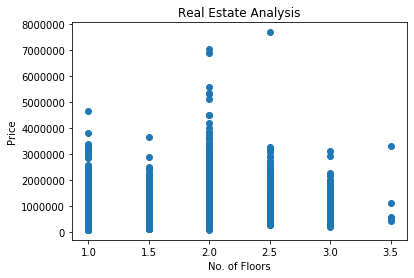

In [401]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Real Estate Analysis')
plt.xlabel('No. of Floors')
plt.ylabel('Price')
plt.show()

#### 3. Split the records for training & testing

In [402]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [403]:
data.shape

(21613, 5)

In [404]:
X_train.shape

(17290, 1)

In [405]:
X_test.shape

(4323, 1)

In [406]:
y_train.shape

(17290, 1)

In [407]:
y_test.shape

(4323, 1)

#### 4. Model Building with sklearn

In [408]:
lin_reg = LinearRegression()

#### 5. Train the model

In [409]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [410]:
lin_reg.coef_

array([[171376.44562902]])

In [411]:
lin_reg.intercept_

array([283309.93245028])

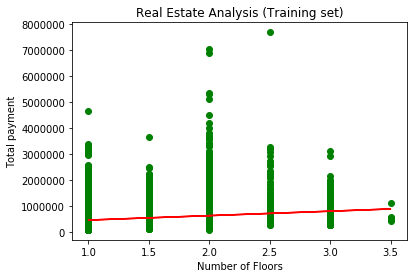

In [412]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Real Estate Analysis (Training set)')
plt.xlabel('Number of Floors')
plt.ylabel('Total payment')
plt.show()

#### 6. Test the model

In [413]:
ypred = lin_reg.predict(X_test)
ypred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

In [414]:
X_test.head()

,floors
6638,1.5
7366,1.0
3158,1.0
9117,2.0
3392,1.0


In [415]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


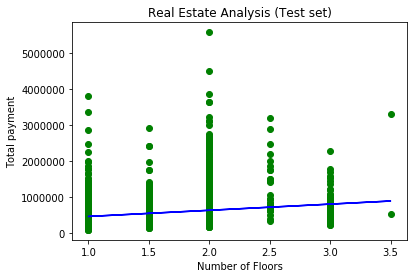

In [417]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Real Estate Analysis (Test set)')
plt.xlabel('Number of Floors')
plt.ylabel('Total payment')
plt.show()

#### 7. Estimate the cost

In [418]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.0733487976687478
The RMSE value is........ 359677.77234107786


># price vs floors: Poor Fit
># Floors are not siginificant for price.

In [419]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


#### 8. How to predict for unseen value

In [420]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[5.54514735e+08]]
